- We continue with the methods of measurement of classification models' performance

- The confusion matrix is very helpful to understand the details of our classifiers performance however we still need some metrics to interpret more directly to choose the best model 

- So in this notebook we will talk about the metrics like **sensitivity (recall), specifity, precision and F1 score** 
- These metrics can be computed from a confusion matrix and are more efficient to choose the best model. 


- In the first part we remind the concepts and in the second part we will apply these concepts for evaluating some classifiers' performance
- Skitlearn provides all these scores by `ClassificationReport`
![sheep](/images/sheep.png)

<!-- TEASER_END -->

In [1]:
# Notebook setup
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score

import category_encoders as ce
from yellowbrick.classifier import ClassificationReport

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Part-1

## Accuracy, Sensitivity (Recall), Specifity, Precision
- Lets talk about these metrics
- In this contex `POSITIVE` means that an instance belonging to the **class of interest**

### Accuracy

- Overall how often the classifier is predicting correctly **Positive Class (1)** and the **Negative Class(0)**
- `#all correct predictions (diagonal values) / #all predictions `


- With imbalance datasets the accuracy is not a good metric. 

Look at the confusion matrix below
- We have **998 NEGATIVE** and **2 POSITIVE** classes. 
- The accuracy **999/1000=0.999**. It is a high accuracy score
- However `accuracy` by itself is not reliable in this case. 
- Think of a classifier which allways only says `NEGATIVE` when predicting any sample, also get a **998/1000= 0.998** accuracy

- Accuracy can be largely contributed by a large number of **TRUE**(ly) predicted **NEGATIVE**s (like non-spam, non-fradulent, not sick etc) which in most business circumstances, we do not focus on much.

![acc1](/images/acc1.png)

### True Positive Rate (Sensitivity, Recall)

- The ability of a classifier to find all **POSITIVE** instances. 
- How good is the model at capturing the **Positive Class** samples


- Among all of the actual **Positive Class(1)** samples, what portion of them is classified correctly?


- `#samples TRUE(ly) predicted POSITIVE / #all actual POSITIVE samples`


- The term **"recall"** is coming from information retrivieal domain. 
- [Here](https://math.stackexchange.com/questions/707667/whats-the-meaning-of-the-term-recall-in-information-retrieval) you can find an explanation on the semantic of the term

- It may have been better to use **Recall Rate** term


- If we compute the sensitivity of the table above, we will see that it is not high even though accuracy is very high.
    - True Positive= 1
    - All Positives= 2
    - True Positive Rate = 1/2 -> 0.5

![all3](/images/all3.png)

### True Negative Rate (Specifity)

- The ability of a classifier to find all **NEGATIVE** instances. 
- How good is the model at capturing the **NEGATIVE Class** samples


- Among all of the **Negative Class(0)** samples, what portion of them is predicted correctly?

- `#samples TRUE(ly) predicted NEGATIVE / #all NEGATIVE samples`

#### An Analogy for `Sensivity` and `Specifity`

Think of a drug-sniffing security dog. 
- If the dog’s nose is **perfectly sensitive** to the smell of drugs, then it will detect all the hidden packets of drugs;  
- if it is **less sensitive**, then it will fail to detect some of the packets. 
    
    
At the same time, the dog should react **specifically** to drugs, and not for food or other objects
- If the dog is **highly specific** in its reactions, it will only react to drugs;
- if it is **less specific**, then it will react to other stuff also


We expect from the dog to 
- higly detect the bags with drugs (find all actual POSITIVEs)
- higly **NOT** to detect the bags without drugs, let them go without any reaction, (find all the actual NEGATIVEs)

So there is a trade off between **Specificity (True Positive Rate)** and **Sensitivity (True Negative Rate)**.

- If the dog treat every bag as drug contained; 
    - this procedure is perfectly **sensitive** (perfect **True Positive Rate**) 
    - it will detect every packet of drugs, all actual POSITIVEs for sure but
    - not specific at all. It creates cost of false accusations. 


- If the dog treat all the bags as none of them containing drugs 
    - this is perfectly **specific** (perfect **True Negative Rate**)
    - it means it will find all actual NEGATIVEs and not react to them. (We will never make a false accusation), but
    - not sensitive at all. It creates cost of missing the drug contained bags

### False Positive Rate
- Among all of the **Negative Class(0)** samples, what is the fraction of the predictions that the model falsely predict as POSITIVE?

- `#samples FALSE(ly) predicted as POSITIVE / #all NEGATIVE samples`

### Precision
- For all instances classified as **POSITIVE Class(1)**,  what percent was correct?
- The ability of a classifer **NOT** to label an instance **POSITIVE** that is **actually NEGATIVE**. 
- `#samples TRUE(ly) predicted as POSITIVE / #all predictions made as POSITIVE Class(1)`



- Here the denominator is the **predictions**, not the actual number of classes like in sensitivity and specifity

- When the data is **imbalanced** ie has "skewed classes", **precision** standalone is not a good performance metric. 



![acc1](/images/acc1.png)


In the table above, again we have a skewed classes data: **998 Negative, 2 Positive**

- precision = `TP/all POSITIVE Class(1) predictions` -> **1/1 = %100**
- This is not relaible by itself. 
- Think of any classifier which allways only says POSITIVE when predicting any sample, could get the same precision



- That is why we should use the **Precision** and **Recall** together for more accurate measurements

- An ideal algorithm should have high precision and recall (True Positive Rate) values. 

- But for a given algorithm, there is a trade of between precision and recall.
- Setting the **classification threshold** higher or lower will change the values of precision and recall

### F1 Score

![f1](/images/f1.png)


- A weighted harmonic mean of **precision** and **recall** 
- Best score is `1.0` when both precision and recall are `1` and the worst is `0.0`
- When either **recall** or **precision** is small, the score will be small. 


- It is a convenient single score to characterize overall accuracy, especially for comparing the performance of different classifiers.



- As a rule of thumb, the **weighted average of F1** should be used to compare classifier models




- Using $ F_1$ to compare classifiers assumes that precision and recall are equally important for the application.



- If one criterion is more important than the other, then one can also use the weighted geometric mean:

    - $\displaystyle F_\alpha = (1 + \alpha)($precision$\displaystyle \times$   recall$\displaystyle )/(\alpha$   precision + recall$\displaystyle ) $

    - $ \alpha$ describes how much more important recall is than precision: 
    - use $ F_2$ if recall is twice as important as precision, 
    - $ F_{0.5}$ if precision is twice as important as recall.


- It is still better to have separate target goals for precision and recall that a candidate classifier must meet.

### Choosing a Metric for Model Evaluation
Choise of metric depends on our business objectives, in other words depends of what business challenge we are trying to solve using the model.<br>



Ultimately we 
- make a value judgement about which errors to minimize and
- choose an appropriate metric to match that judgement

Here are two different examples of problems we want to solve:

**1- Email Spam Detection:** <br>
If our goal is to create a spam filter (in this case spam is POSITIVE, non-spam is NEGATIVE class):

- We have to make a value judgement here between the cost of false classifications
    - the cost of loosing an important mail in the spam box and
    - the cost of having a spam in the inbox
 


- In email spam detection, **Precision** or **Specifity** becomes more important as a metric because 
    - **FALSE**(ly) predicted **NEGATIVE**s (true spam goes into the inbox, **spam not caught**) is more accaptable than
    - **FALSE**(ly) predicted **POSITIVE**s (non-spam goes into the spam box, **normal mail caught as spam**)
 
 
 
- **Precision** is a good measure to determine, when the **costs of FALSE POSITIVE is high**. 
    - In email spam detection, again a **FALSE POSITIVE** means that an email that is non-spam (actual negative) has been identified as spam (predicted as spam). 

    - The email user might lose important emails in the spam box if the precision is not high for the spam detection model.


    
**2- Fradulent Transaction Detection:** <br>
If our goal is to create a fraud detector (in this case fraudelent transaction is POSITIVE, non-fraudelent is NEGATIVE):
 
 - We have to make a value judgement here between false classifications
    - the cost of labeling a normal transaction as fraudelent and
    - the cost of missing a fraudelent transaction
    
  
- In Fradulent Transaction Detection, we need to optimize for **Sensitivity(Recall)** because
    - **FALSE**(ly) predicted as **POSITIVE**s (normal transactions that are flagged as possible fraud) are more acceptable than
    - **FALSE**(ly) predicted as **NEGATIVE**s (fraudelent transactions that are not detected, missed the fraud case)



 - **Sesitivity (Recall)** is a good measure to determine when there is a high cost associated with **FALSE NEGATIVE**,
   - For instance, in fraud detection or sick patient detection
   - If a fraudulent transaction (actual POSITIVE) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.
   
   - Similarly, if a sick patient (actual POSITIVE) goes through the test and predicted as not sick (predicted as NEGATIVE), the cost associated with **FALSE NEGATIVE** will be extremely high if the sickness is contagious or severe


- **FALSE NEGATIVE** and **FALSE POSITIVE** usually has business costs (tangible & intangible). Generally speaking, 
    - for the False Negative the cost comes from not taking actions towards it, like not doing anything for the fraud, sick patient cases
    - for the False Positive the cost comes from taking wrong actions towards it, like sending a normal mail into spam box
    
    

- These are known as Type I and Type II errors also:
- **Type I error** (“FALSE POSITIVE”) is detecting an effect that is not present (e.g. determining a mushroom is poisonous when it is in fact edible).

- **Type II error** (“FALSE NEGATIVE”) is failing to detect an effect that is present (e.g. believing a mushroom is edible when it is in fact poisonous).




- **F1 SCORE** can be a choise when
    - you want to seek a balance between Precision and Recall and
    - there is an **uneven class distribution (large number of actual NEGATIVEs)**.

## Some points to remember:

- Classifier  performance are not one-dimensional.
- Different fields use different (but related) measures of accuracy.


- Classifier performance depend on 
    - the relative cost of **Type I** and **Type II errors**, as well as 
    - on the **proportion of positive and negative instances** in the population of interest.

# Part-2

## Loading and Exploring the Dataset

- Lets make a classification performance evaluation on the `mushroom` dataset

- We will use a **modified version** of the `mushroom` dataset from the **UCI Machine Learning Repository**.
- Even though these toy datasets are not very interesting anymore because of repetitive usage, here our focus is the classification metrics not other steps of data processing. So we try to get the advantage of fast implementation of this dataset


- Our objective is to predict if a mushroom is **poisonous** or **edible** based on its characteristics.
- The data include descriptions of samples of mushrooms
- Each species was identified as definitely **edible** or **poisonous**

In [3]:
# Url of the dataset
url='https://raw.githubusercontent.com/rebeccabilbro/rebeccabilbro.github.io/master/data/agaricus-lepiota.txt'

# Column names list
column_names=['class', 'cap-shape', 'cap-surface', 'cap-color']
# Load the data
mushrooms=pd.read_csv(url, header=None, names= column_names)

mushrooms.head(3)

class cap-shape cap-surface cap-color
0     edible    convex      smooth    yellow
1     edible      bell      smooth     white
2  poisonous    convex       scaly     white

### Target and Features Datasets

In [5]:
# Create the features dataset (X) and target dataset (y)
features = ['cap-shape', 'cap-surface', 'cap-color']
target   = 'class'

X = mushrooms[features]
y = mushrooms[target]

### Classifiers Dictionary
- Now, let's create a dictionary which contains the classifiers we want to use for our classification task
- Here we create the dictionary with instantiates of Sklearn estimators **without hyperparameter tuning**. 
- In reality we need to evaluate the performance of tuned classifiers.

In [15]:
# Estimators dictionary
# We can add as more classifiers to our dictionary
# This is just a sample
estimators_dct={"NuSVC": NuSVC(),
                "SVC": SVC(), 
                "Linear SVC" : LinearSVC(),
                "SGD Classifier": SGDClassifier(),
                "KNeighbors Classifier": KNeighborsClassifier(),
                "Logistic Regression CV": LogisticRegressionCV(),
                "Logistic Legression": LogisticRegression(),
                "Bagging Classifier": BaggingClassifier(),
                "Random Forest Classifier": RandomForestClassifier(n_estimators=8),
                "Extra Trees Classifier": ExtraTreesClassifier(),
                "SGD Classifier": SGDClassifier()}

## model_selection function 
- Let's define a function to get the **Precision, F1** and **Recall Scores** of a given dictionary of models (like in the upper cell) easily without repetion.


- Our function will
    - take **X, y datasets** and an **estimator dictionary** 
    - return a nested dictionary containing the **Precision, F1** and **Recall Scores** produced by the predictions of each model in the estimators dictionary

In [126]:
def model_selection_all(X, y, estimator_dict):
    """
    Takes X_train, y_train datasets, an estimator dictionary -> 
    returns an ordered list based on the values of the F1 scores of the classifiers in the dictionary
    """
    # Split the data as train and test
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=11)
    
    f1_dct={}
    precision_dct={}
    recall_dct={}
    
    # Loop over the estimator_dict keys to get each estimator 
    for estimator in estimator_dict.keys():
                
        # In the pipeline we use OneHotEncoder from Category Encoders
        model = Pipeline([('encoder', ce.OneHotEncoder()),
                          ('estimator', estimator_dict[estimator])])
        
        # Instantiate the classification model 
        model.fit(X_train, y_train)
        
        # Get the predictions of the model
        predicted = model.predict(X_test)

        # Compute and return the:
        # F1 scores (the harmonic mean of precision and recall)
        # Precision scores
        # Recall scores as separate dictionaries
        f1_dct[estimator]=round(f1_score(y_test, predicted, pos_label='edible'), 4)
        precision_dct[estimator]= round(precision_score(y_test, predicted, pos_label='edible'), 4)
        recall_dct[estimator]= round(recall_score(y_test, predicted, pos_label='edible'), 4)
        
    # Return the sorted list of the F1, Precision, Recall scores in descending order
    return {"Precision": sorted(precision_dct.items(), 
                                key=lambda x:x[1], 
                                reverse=True),
            
            "Recall": sorted(recall_dct.items(), 
                             key=lambda x:x[1], 
                             reverse=True),
            
            "F1": sorted(f1_dct.items(),
                         key=lambda x:x[1], 
                         reverse=True)}

In [127]:
# Call model_selection function to get the sorted f1, precision, recall scores
model_selection_all(X, y, estimators_dct)

{'Precision': [('KNeighbors Classifier', 0.7855),
  ('Bagging Classifier', 0.7497),
  ('Extra Trees Classifier', 0.7177),
  ('Random Forest Classifier', 0.7166),
  ('SVC', 0.7016),
  ('Linear SVC', 0.6959),
  ('Logistic Regression CV', 0.6959),
  ('Logistic Legression', 0.6959),
  ('NuSVC', 0.6569),
  ('SGD Classifier', 0.5322)],
 'Recall': [('SGD Classifier', 0.9612),
  ('Extra Trees Classifier', 0.7506),
  ('Random Forest Classifier', 0.7376),
  ('Bagging Classifier', 0.6941),
  ('Linear SVC', 0.6624),
  ('Logistic Regression CV', 0.6624),
  ('Logistic Legression', 0.6624),
  ('SVC', 0.6612),
  ('KNeighbors Classifier', 0.56),
  ('NuSVC', 0.5518)],
 'F1': [('Extra Trees Classifier', 0.7338),
  ('Random Forest Classifier', 0.727),
  ('Bagging Classifier', 0.7208),
  ('SGD Classifier', 0.6851),
  ('SVC', 0.6808),
  ('Linear SVC', 0.6787),
  ('Logistic Regression CV', 0.6787),
  ('Logistic Legression', 0.6787),
  ('KNeighbors Classifier', 0.6538),
  ('NuSVC', 0.5997)]}

## Evaluation of Mushroom Classifier

We have to make a value judgement here between the cost of false classifications (False Positive and False Negative)
- the cost of falsely classifying a mushroom as Poisonous which is actually Edible 
- the cost of falsely classifiying a mushroom as Edible which is actually Poisonous 



- Without doubt the cost of the latter (classifiying a mushroom as Edible which is actually Poisonous) is too high. It can cause to loose our lives!

- So in mushroom detection! problem we need to be very sensitive to the **presion and specifitiy scores of the Edible class** 

- So regarding the precision scores KNeighbors Classifier has the highest precision but still not enough to rely on :)
- Reminder: Here we did not do hyperparameter tuning for the classifiers

### Visual Model Evaluation with Mushroom Dataset

- Now let’s display the precision, recall, and F1 scores by using Yellowbrick’s `ClassificationReport` visualizer

- This allows us interpret easily Type I and Type II error with numerical scores as well as color-coded heatmaps

In [124]:
def model_selection_visiual(X, y, estimator_dict):
    """
    Takes X, y datasets, an estimator dictionary -> 
    returns the Classification of classifiers in the dictionary
    """
    
    # Split the data as train and test
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=11)
    
    f1_dct={}
    
    # Loop over the estimator_dict keys to get each estimator 
    for estimator in estimator_dict.keys():
        print(estimator)
                
        # In the pipeline we use OneHotEncoder from Category Encoders
        model = Pipeline([('encoder', ce.OneHotEncoder()),
                          ('estimator', estimator_dict[estimator])])
        
        # Instantiate the classification model 
        model.fit(X_train, y_train)
        
        # Set the current ax to the first ax in the axes_lst every time after popping the first element
        _, ax=plt.subplots()
        
        # Instantiate the classification model and visualizer
        visualizer = ClassificationReport(model,
                                          ax=ax, 
                                          classes=['edible', 'poisonous'], 
                                          size=(600, 200),
                                          cmap='YlOrBr', 
                                          title= estimator)
        visualizer.score(X_test, y_test)
        
        # argument to the poof method!
        visualizer.poof()

NuSVC


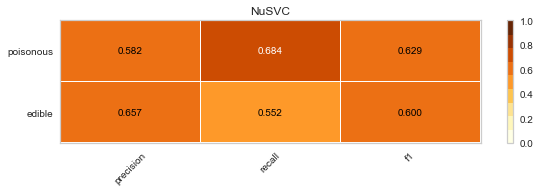

SVC


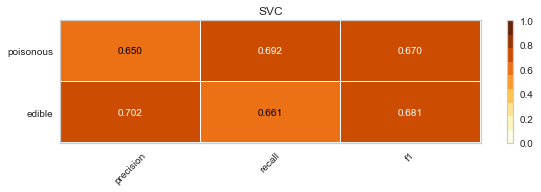

Linear SVC


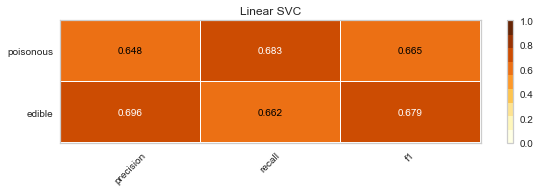

SGD Classifier


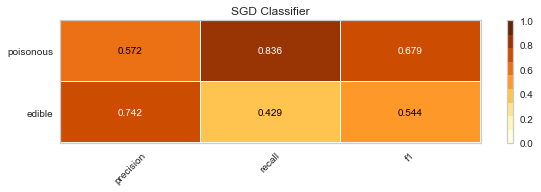

KNeighbors Classifier


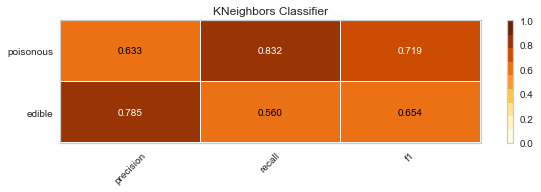

Logistic Regression CV


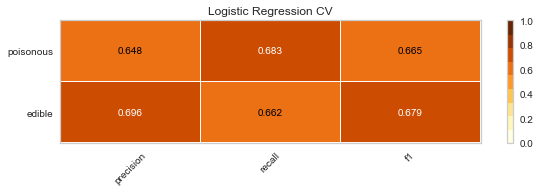

Logistic Legression


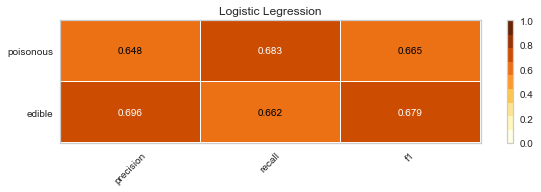

Bagging Classifier


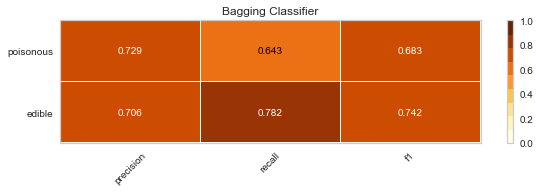

Random Forest Classifier


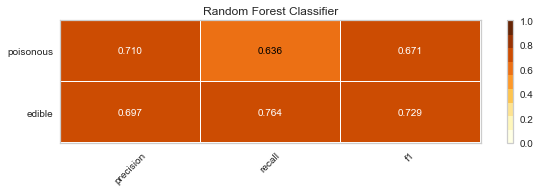

Extra Trees Classifier


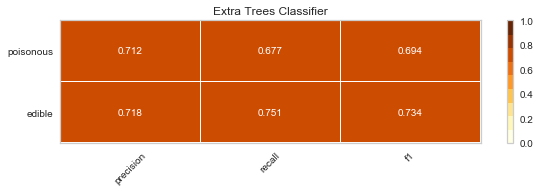

In [125]:
model_selection_visiual(X, y, estimators_dct)

We can plot the Classification Reports n two columns

In [86]:
def model_selection_visiual(X, y, estimator_dict):
    """
    Takes X_train, y_train datasets, an estimator dictionary -> 
    returns an ordered list based on the values of the F1 scores of the classifiers in the dictionary
    """
    
       # Create a new figure to draw the classification report on
        #fig, ax = plt.subplots()
        
    row_number=int(len( estimator_dict)/2)+1
    
        # Create figure and axes
        # Fix the number of column of the figure by ncols=2 and
        # Let the row_number change by the size of the estimator dictionary
        # Delete the last empty subplots at the end
    fig, axes = plt.subplots(nrows=row_number, ncols=2,
                                 figsize=(200, 200))
                                 #sharex=True, 
                                # sharey=True)
    # Flatten the axes and convert into a list 
    # in order to be able to pop the elements one by one
    axes_lst=list(axes.flatten())
   
    # Split the data as train and test
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=11)
    
    f1_dct={}
    
    # Loop over the estimator_dict keys to get each estimator 
    for estimator in estimator_dict.keys():
        #print(estimator)
                
        # In the pipeline we use OneHotEncoder from Category Encoders
        model = Pipeline([('encoder', ce.OneHotEncoder()),
                          ('estimator', estimator_dict[estimator])])
        
        # Instantiate the classification model 
        model.fit(X_train, y_train)
        
        # Set the current ax to the first ax in the axes_lst every time after popping the first element
        ax=axes_lst.pop(0)
        
        # Instantiate the classification model and visualizer
        visualizer = ClassificationReport(model,
                                          ax=ax, 
                                          classes=['edible', 'poisonous'], 
                                          fontsize=20, 
                                          size=(1500, 1200),
                                          cmap='YlOrBr', 
                                          title= estimator)
        visualizer.score(X_test, y_test)

    # Note that to save the figure to disk, you can specify an outpath
    # argument to the poof method!
    [ax.remove() for ax in axes_lst]
    visualizer.poof()

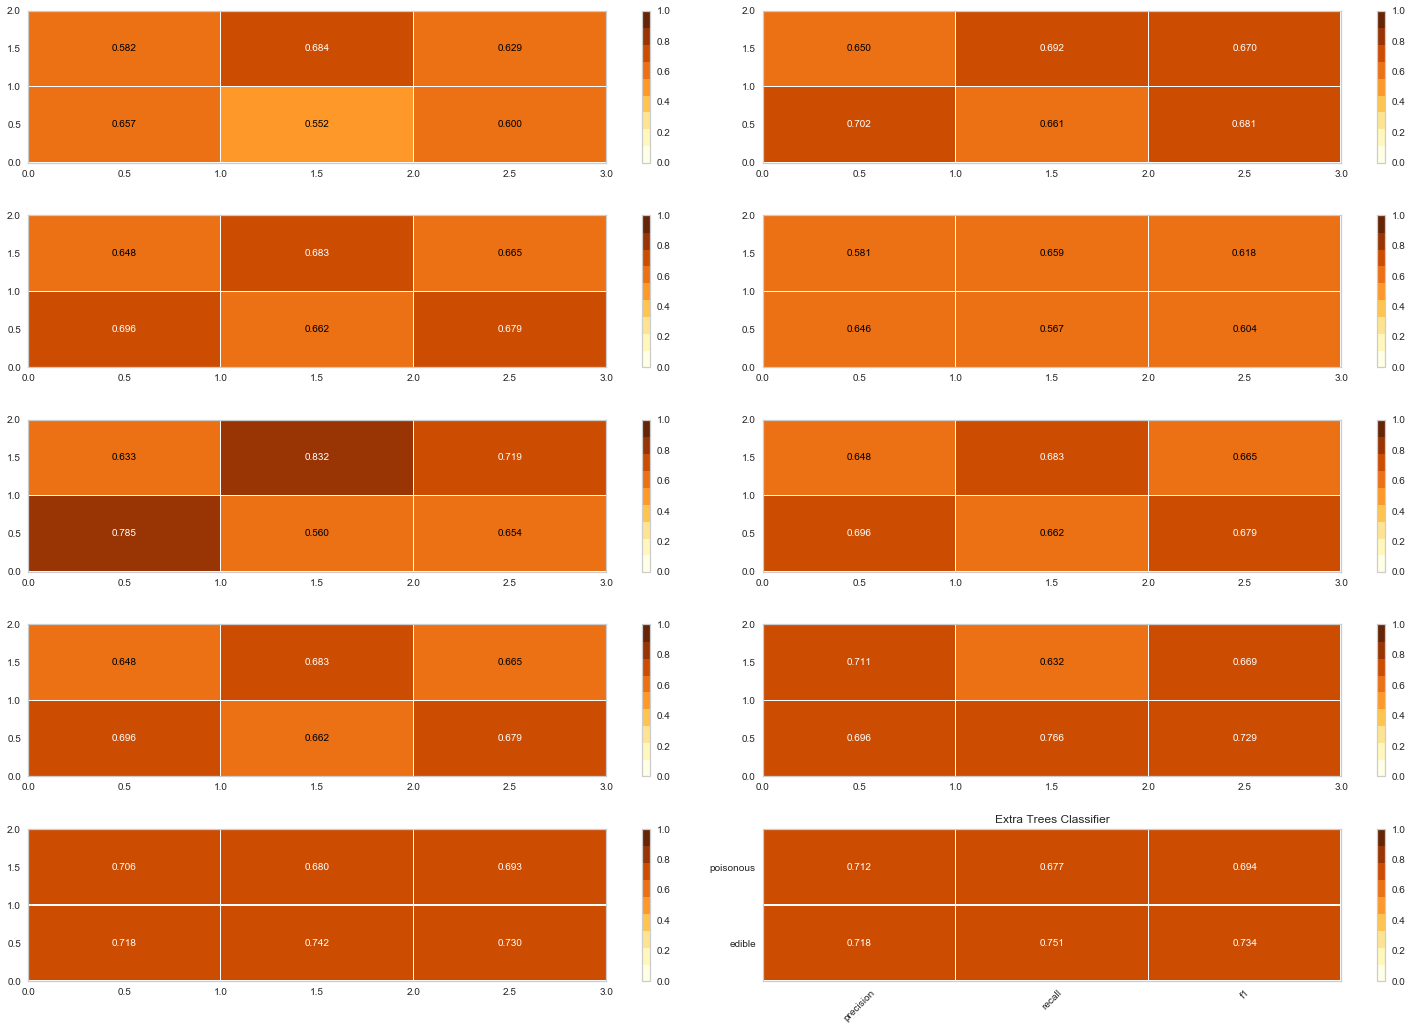

In [87]:
model_selection_visiual(X, y, estimators_dct)

Sources: 
- http://www.scikit-yb.org/en/latest/tutorial.html
- http://www.win-vector.com/blog/2009/11/i-dont-think-that-means-what-you-think-it-means-statistics-to-english-translation-part-1-accuracy-measures/